In [1]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
import pandas as pd
import numpy as np
%matplotlib inline

In [4]:
X,y=make_blobs(n_samples=1000,centers=3,n_features=2)

In [5]:
X

array([[-8.53866474,  4.42465766],
       [ 6.33841115,  9.73826836],
       [ 0.74401658, -0.05893257],
       ...,
       [ 7.71034405,  8.65695576],
       [ 8.28643677,  9.29965177],
       [ 1.90868335, -0.18799327]])

In [6]:
y

array([2, 0, 1, 1, 2, 0, 1, 1, 2, 1, 2, 1, 0, 2, 1, 0, 2, 2, 1, 2, 0, 0,
       1, 1, 2, 0, 1, 0, 1, 0, 0, 1, 2, 0, 2, 0, 2, 1, 1, 1, 0, 0, 0, 2,
       1, 0, 0, 0, 0, 0, 0, 1, 2, 0, 1, 1, 0, 2, 1, 0, 1, 0, 2, 0, 0, 2,
       1, 1, 1, 2, 0, 1, 2, 0, 0, 2, 2, 2, 2, 1, 2, 0, 1, 2, 1, 0, 2, 0,
       2, 2, 0, 1, 0, 0, 1, 2, 1, 2, 2, 0, 1, 1, 0, 2, 0, 0, 2, 2, 1, 2,
       1, 2, 0, 2, 2, 2, 1, 1, 1, 2, 1, 1, 1, 2, 1, 0, 0, 1, 1, 2, 2, 2,
       2, 1, 0, 2, 0, 0, 0, 1, 2, 1, 0, 1, 2, 2, 2, 1, 0, 2, 0, 0, 2, 1,
       0, 0, 2, 2, 1, 1, 2, 0, 1, 1, 1, 2, 2, 1, 1, 0, 0, 1, 1, 1, 2, 1,
       1, 0, 1, 0, 0, 1, 2, 2, 0, 1, 1, 1, 2, 1, 0, 0, 0, 0, 2, 2, 0, 2,
       0, 0, 0, 2, 1, 1, 2, 2, 0, 2, 2, 2, 2, 0, 0, 2, 1, 1, 2, 1, 0, 0,
       1, 1, 0, 2, 0, 1, 2, 0, 1, 1, 2, 0, 2, 2, 1, 1, 2, 0, 1, 2, 1, 0,
       1, 2, 2, 0, 2, 1, 2, 2, 1, 1, 1, 0, 2, 1, 1, 2, 0, 0, 2, 0, 2, 2,
       0, 1, 0, 0, 1, 2, 1, 1, 2, 2, 1, 1, 2, 2, 2, 1, 0, 0, 2, 2, 2, 2,
       0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0,

In [7]:
#In unsupervised we are not going to take y features,we take only X features

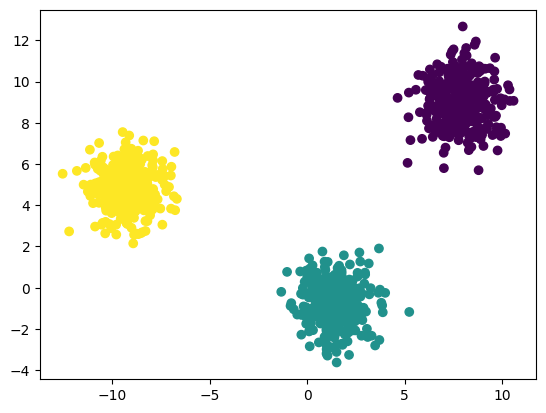

In [9]:
plt.scatter(X[:,0],X[:,1],c=y)

In [10]:
#Perfirming standasrdization 

In [11]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [12]:
from sklearn.model_selection import train_test_split

In [13]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.33,random_state=42)

In [14]:
X_train_scale=scaler.fit_transform(X_train)

In [15]:
X_test_scale=scaler.transform(X_test)

In [16]:
#We dont fo scaling for the output feature

In [17]:
from sklearn.cluster import KMeans

In [18]:
##Elbow method(to select the K value)
wcss=[]
for k in range(1,11):
    kmeans=KMeans(n_clusters=k,init="k-means++")
    kmeans.fit(X_train_scale)
    wcss.append(kmeans.inertia_)

In [19]:
wcss

[1339.999999999999,
 768.72270476475,
 52.944875708537545,
 43.91350702800701,
 37.03535582126276,
 26.9462130196926,
 24.510719291244104,
 22.50835541805865,
 20.38715326016646,
 19.162860246841706]

In [20]:
#To know the k value lets us plot wrt wcss

Text(0, 0.5, 'WCSS')

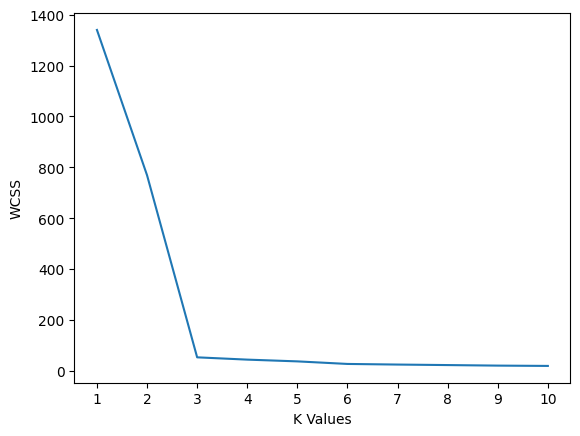

In [23]:
#Plot Elbow curve
plt.plot(range(1,11),wcss)
plt.xticks(range(1,11))
plt.xlabel('K Values')
plt.ylabel('WCSS')

In [24]:
# Here we can observe that from 3 there is stable decrease
#so we can select our k value as 3 

In [27]:
kmeans=KMeans(n_clusters=3,init="k-means++")

In [29]:
kmeans.fit_predict(X_train_scale)

array([0, 2, 1, 0, 2, 1, 0, 1, 2, 1, 1, 2, 1, 0, 1, 1, 2, 0, 0, 2, 1, 1,
       2, 2, 0, 2, 0, 2, 0, 2, 0, 1, 2, 1, 1, 1, 1, 0, 1, 1, 0, 2, 2, 1,
       1, 1, 2, 0, 1, 0, 1, 2, 1, 1, 1, 2, 2, 2, 2, 0, 1, 0, 0, 1, 1, 0,
       0, 0, 2, 0, 2, 2, 0, 2, 0, 1, 0, 2, 1, 1, 2, 0, 2, 0, 0, 1, 2, 2,
       0, 0, 1, 0, 1, 0, 2, 0, 2, 0, 0, 2, 2, 0, 0, 0, 2, 0, 2, 1, 1, 1,
       2, 1, 2, 0, 2, 2, 1, 1, 0, 2, 0, 0, 2, 1, 2, 2, 2, 2, 0, 0, 0, 2,
       1, 2, 0, 0, 2, 0, 2, 1, 1, 0, 2, 2, 0, 2, 2, 1, 1, 1, 2, 1, 1, 2,
       0, 2, 0, 1, 1, 2, 2, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 2, 1, 0,
       1, 1, 0, 0, 2, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 2, 2, 2, 0, 0, 1, 1,
       2, 0, 2, 1, 2, 2, 0, 1, 1, 2, 1, 2, 2, 1, 2, 1, 1, 0, 1, 1, 1, 0,
       1, 2, 0, 2, 0, 1, 0, 1, 0, 0, 2, 1, 1, 1, 2, 1, 2, 0, 2, 2, 2, 1,
       2, 0, 2, 2, 0, 1, 2, 0, 0, 2, 0, 0, 0, 0, 0, 2, 1, 1, 0, 2, 2, 0,
       0, 0, 0, 2, 0, 1, 2, 1, 2, 1, 0, 0, 0, 2, 0, 1, 0, 1, 2, 1, 1, 1,
       1, 0, 1, 0, 2, 2, 1, 1, 2, 1, 0, 2, 1, 0, 0,

In [30]:
y_pred=kmeans.predict(X_test_scale)

In [31]:
y_pred

array([2, 2, 0, 0, 1, 1, 2, 1, 0, 0, 2, 2, 1, 1, 0, 0, 0, 2, 0, 1, 1, 2,
       2, 1, 2, 1, 1, 2, 1, 2, 1, 1, 2, 0, 2, 0, 2, 1, 2, 0, 0, 1, 2, 0,
       1, 2, 2, 2, 2, 0, 2, 1, 0, 0, 1, 0, 2, 2, 1, 1, 1, 1, 1, 2, 1, 2,
       2, 2, 0, 2, 2, 1, 2, 2, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 0, 2, 0, 0,
       2, 2, 0, 2, 0, 0, 2, 0, 0, 2, 0, 1, 0, 2, 0, 1, 0, 1, 0, 1, 1, 0,
       2, 0, 2, 0, 2, 0, 0, 2, 1, 0, 0, 0, 2, 2, 0, 2, 1, 1, 2, 0, 1, 0,
       1, 1, 1, 1, 1, 1, 0, 2, 1, 1, 2, 0, 1, 0, 2, 2, 2, 1, 1, 1, 2, 2,
       0, 0, 1, 1, 1, 1, 0, 2, 1, 2, 2, 0, 0, 0, 0, 0, 0, 1, 1, 2, 0, 1,
       2, 0, 1, 2, 0, 1, 1, 1, 2, 0, 2, 1, 1, 0, 0, 2, 2, 0, 2, 0, 0, 2,
       2, 2, 0, 2, 0, 1, 1, 0, 2, 1, 1, 0, 2, 1, 2, 1, 1, 0, 2, 2, 0, 2,
       0, 2, 0, 0, 0, 1, 2, 2, 2, 0, 1, 2, 0, 1, 0, 1, 0, 2, 0, 2, 1, 2,
       2, 0, 0, 2, 2, 2, 1, 0, 1, 1, 1, 0, 0, 0, 2, 2, 2, 0, 0, 1, 2, 0,
       0, 1, 1, 1, 0, 2, 2, 1, 1, 1, 1, 1, 0, 2, 0, 0, 2, 0, 2, 0, 0, 0,
       1, 1, 0, 1, 2, 2, 1, 2, 0, 1, 1, 2, 1, 0, 1,

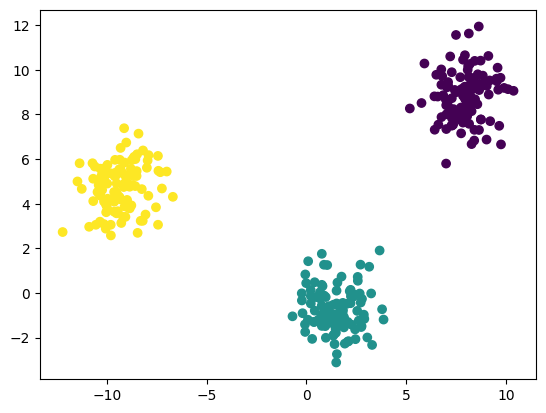

In [32]:
plt.scatter(X_test[:,0],X_test[:,1],c=y_pred)

In [33]:
#WRT to test data also i able to get good plot

In [34]:
#validating the K value
# Knee Locator
# Silhoutee scoring

In [35]:
#Knee locator
!pip install kneed

In [39]:
from kneed import KneeLocator

In [41]:
kl=KneeLocator(range(1,11),wcss,curve="convex",direction="decreasing")

In [42]:
kl.elbow

np.int64(3)

In [43]:
# Silhoutee Score
from sklearn.metrics import silhouette_score


In [44]:
silhoutee_coefficients=[]
for k in range(2,11):
    kmeans=KMeans(n_clusters=k,init="k-means++")
    kmeans.fit(X_train_scale)
    score=silhouette_score(X_train_scale,kmeans.labels_)
    silhoutee_coefficients.append(score)

In [45]:
silhoutee_coefficients

[np.float64(0.6436756669632255),
 np.float64(0.8409138066955345),
 np.float64(0.6986517004363461),
 np.float64(0.6532376136975273),
 np.float64(0.4116485317049474),
 np.float64(0.3794318780300852),
 np.float64(0.34754624625108166),
 np.float64(0.3475064522565573),
 np.float64(0.34900142046027505)]

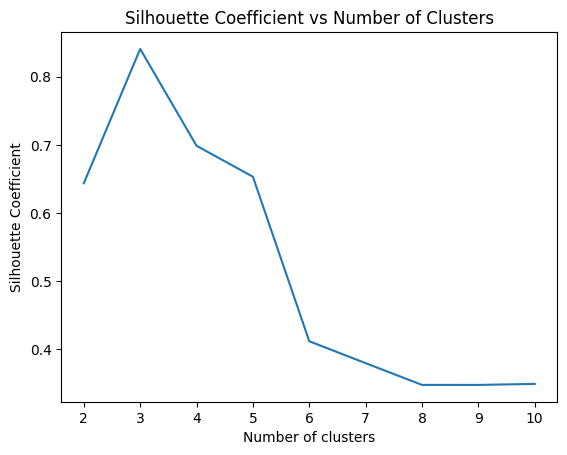

In [47]:
plt.plot(range(2,11),silhoutee_coefficients)
plt.xticks(range(2,11))
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Coefficient')
plt.title('Silhouette Coefficient vs Number of Clusters')
plt.show()

In [49]:
#where ever we can see high value we can say that ,that is our k-Value
#since our silhoutee score is highest